**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**Read CSV**

In [2]:
data=pd.read_csv('/content/survey lung cancer.csv')

In [5]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

## NOTE:
**In dataset 2-> YES 1->NO**

In [6]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [7]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

**Handling Nominal Data**

In [8]:
data.loc[data['GENDER']=='M','GENDER']=1
data.loc[data['GENDER']=='F','GENDER']=0

In [10]:
data.loc[data['LUNG_CANCER']=='YES','LUNG_CANCER']=1
data.loc[data['LUNG_CANCER']=='NO','LUNG_CANCER']=0

In [11]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


**Training and Target data**

In [14]:
x=data.drop('LUNG_CANCER',axis=1)  # axis=1 drops the column 'LUNG_CANCER'
y=data['LUNG_CANCER']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

**Defining Models**

In [16]:
model1=RandomForestClassifier(n_estimators=200,random_state=42)
model2=LogisticRegression(random_state=0)
model3=SVC(kernel="rbf", gamma=0.5, C=1.0)

In [19]:
if y_train.dtype != 'int':
    y_train = y_train.astype(int)
if y_test.dtype != 'int':
    y_test = y_test.astype(int)

In [20]:
model1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
model2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [22]:
model3.fit(x_train,y_train)

SVC(gamma=0.5)

In [23]:
y_pred1=model1.predict(x_test)

In [24]:
y_pred2=model2.predict(x_test)

In [25]:
y_pred3=model3.predict(x_test)

In [26]:
accuracy1=accuracy_score(y_test,y_pred1)
print(accuracy1)
accuracy2=accuracy_score(y_test,y_pred2)
print(accuracy2)
accuracy3=accuracy_score(y_test,y_pred3)
print(accuracy3)

0.967741935483871
0.967741935483871
0.9838709677419355


**Model Saving**

In [27]:
import joblib
joblib.dump(model3, 'SVC.pkl')

['SVC.pkl']

**Classification Report and Confusion Matrix**

In [29]:
classification_rep = classification_report(y_test, y_pred3)
print(classification_rep)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62



In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
cm = confusion_matrix(y_test, y_pred3)

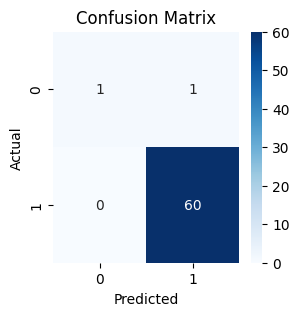

In [37]:
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()